In [2]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd

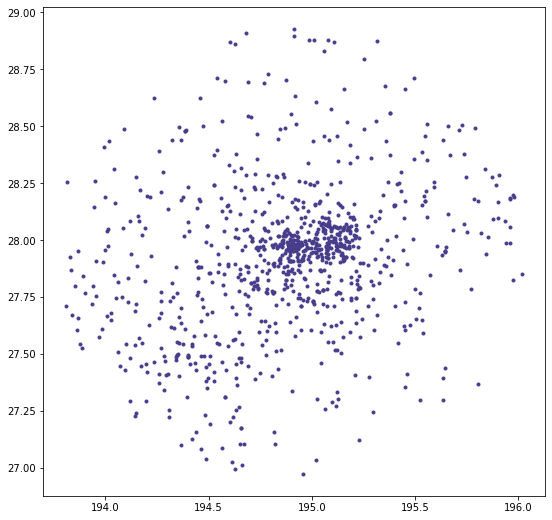

193.80778
194.88243948801744


In [3]:
from csv import reader
# open file in read mode
data = []
with open('num_obj_coma.csv', 'r') as read_obj:
    # pass the file object to reader() to get the reader object
    csv_reader = reader(read_obj)
    # Iterate over each row in the csv using reader object
    for row in csv_reader:
        #print(type(row))
        #row = row.split(',')
        data.append(row)
        # row variable is a list that represents a row in csv
        #print(row)

#data = csv_reader
#print(type(data))
coma = []
for row in data:
    #print(row)
    row = [float(i) for i in row]
    #row = row.split(',')
    coma.append(row)
    #print(row)
    
#print(coma[1,2])
plt.figure(figsize = (9,9))
objs = np.asarray(coma)
plt.plot(objs[:,0], objs[:,1], '.', c = 'darkslateblue')
plt.show()

print(np.min(objs[:,0]))
x_min = np.mean(objs[:,0])
y_min = np.mean(objs[:,1])
print(x_min)

In [4]:
objs[:,0] = [x - x_min for x in objs[:,0]]
objs[:,1] = [y - y_min for y in objs[:,1]]

    
print(min(objs[:,0]))

-1.0746594880174314


In [5]:
objs[:,0] = [x*60 for x in objs[:,0]]
objs[:,1] = [y*60 for y in objs[:,1]]

In [6]:
df = pd.DataFrame({'x': objs[:, 0], 'y': objs[:, 1], 'vel': objs[:, 2], 'z': objs[:, 3], 'M': objs[:, 4]})
df
print(min(df['x']))

-64.47956928104588


In [7]:
distance = 96.2e6 #pc
df['m_abs'] = df['M'] - 5.*np.log10(0.1*distance)
df['L']=10**((5.48-df['m_abs'] )/2.5)
df


,x,y,vel,z,M,m_abs,L
0,0.980431,2.422103,7167.0,0.023907,12.70,-22.215875,1.197706e+11
1,0.951031,2.443103,7195.0,0.024000,24.49,-10.425875,2.303298e+06
2,1.062631,2.951903,6929.0,0.023113,23.70,-11.215875,4.768153e+06
3,0.371431,2.124503,7075.0,0.023600,26.84,-8.075875,2.644540e+05
4,1.794031,2.422703,6558.0,0.021875,22.60,-12.315875,1.313258e+07
...,...,...,...,...,...,...,...
913,68.241631,-4.102897,6381.0,0.021285,17.68,-17.235875,1.219973e+09
914,-59.843369,-23.626897,7144.0,0.023830,20.56,-14.355875,8.597064e+07
915,-64.479569,-12.600097,6674.0,0.022262,16.90,-18.015875,2.502362e+09
916,55.471831,-32.989297,6376.0,0.021268,16.77,-18.145875,2.820656e+09


In [45]:
df['r2d']=np.sqrt(df['x']*df['x']+df['y']*df['y'])
df.sort_values(by=['r2d'],inplace=True)
df['N'] = np.arange(len(df))
df

,x,y,vel,z,M,m_abs,L,r2d,N
36,0.079231,0.128903,7004.0,0.023363,18.50,-16.415875,5.732580e+08,0.151306,0
56,0.466831,-0.742297,7075.0,0.023600,22.90,-12.015875,9.962083e+06,0.876890,1
51,0.620431,-0.693697,6805.0,0.022700,21.30,-13.615875,4.348607e+07,0.930671,2
57,0.852631,-0.796897,6954.0,0.023196,18.47,-16.445875,5.893186e+08,1.167058,3
20,0.848431,0.949703,4476.0,0.014930,18.60,-16.315875,5.228175e+08,1.273488,4
...,...,...,...,...,...,...,...,...,...
895,64.665631,15.581903,6383.0,0.021291,18.15,-16.765875,7.913164e+08,66.516460,913
917,-64.013369,19.982303,6322.0,0.021088,18.30,-16.615875,6.892077e+08,67.059704,914
902,65.560831,16.785503,7111.0,0.023720,13.30,-21.615875,6.892077e+10,67.675517,915
903,65.772031,16.124903,6870.0,0.022916,16.00,-18.915875,5.732580e+09,67.719809,916


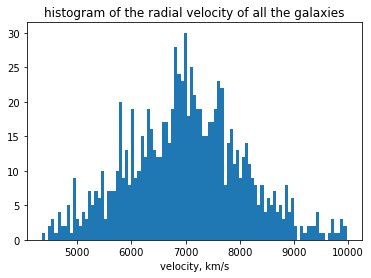

In [9]:
plt.figure()


        
m = max(df['vel'])
n = int(m / 100)
binBoundaries = np.linspace(0, m, n)
_ = plt.hist(df['vel'], n)
plt.title('histogram of the radial velocity of all the galaxies')
plt.xlabel('velocity, km/s')
plt.show()

[  35.83444209 7000.89541537 1027.19382343]


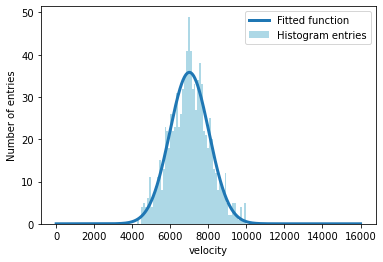

mean velocity: 7000.895415371785 
 dispersion 1027.1938234337215


<Figure size 432x288 with 0 Axes>

In [17]:
from scipy.optimize import curve_fit

def fit_function(x, B, mu, sigma):
    return ( B * np.exp(-1.0 * (x - mu)**2 / (2 * sigma**2)))



bins = binBoundaries
data_entries, bins = np.histogram(df['vel'], bins=bins)
binscenters = np.array([0.5 * (bins[i] + bins[i+1]) for i in range(len(bins)-1)])

popt, pcov = curve_fit(fit_function, xdata=binscenters, ydata=data_entries, p0=[20, 6000, 700])
print(popt)

xspace = np.linspace(0, 16000, len(df['vel']))

plt.bar(binscenters, data_entries, width = bins[1] - bins[0], color='lightblue', label='Histogram entries')
plt.plot(xspace, fit_function(xspace, *popt), linewidth=3, label=r'Fitted function')


plt.xlabel(r'velocity')
plt.ylabel(r'Number of entries')
plt.legend(loc='best')
plt.show()
plt.clf()

disper = popt[2]
print('mean velocity:', popt[1], '\n', 'dispersion', popt[2])

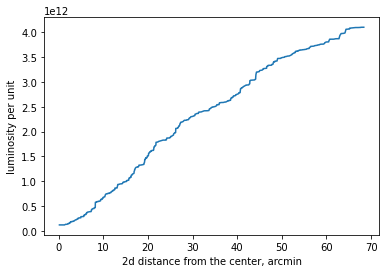

In [11]:
lr = []
lor = 0
for i in range(len(df['L'])):
    lor += df['L'][i]
    lr.append(lor)

plt.plot(df['r2d'], lr)
plt.xlabel("2d distance from the center, arcmin")
plt.ylabel("luminosity per unit")
plt.show()

In [106]:
#virial
G = 4.3e-3 #pc/Msun km/s
print('virial mass =', 3.*disper**2*2.e6/G/10**15, '1e15 Msun')

virial mass = 1.4722704431168196 1e15 Msun


In [104]:
#r200
H_2021 = 74 #km/s /Mpc
r200 = np.sqrt(3) * disper / (10 * H_2021)
print (r200, 'Mpc')
#M200 = 4/3 * pi * 200 * R200^3 * rho_crit

G = 4.3 * 10**(-9) #Mpc / M_sun * (km/s)^2
rho_c = 3 * (H_2021)**2 / (8 * np.pi * G) #M_sun/pc^3 * 10^-12
print(rho_c)
M200 = 4/3 * np.pi * 200 * (r200**3) * rho_c
print ('roughly', round((M200/10**15), 2), '* 10^15 M_Sun')

2.4042593127137026 Mpc
152011477041.49167
roughly 1.77 * 10^15 M_Sun


In [75]:
def sigma_nfw_f_ini(R0, coef, rs):
    x=R0/rs
    if x<1:
        sigma_nfw = 2./(x*x-1.) * ( 1.-2./np.sqrt(1-x*x) * np.arctanh(np.sqrt((1.-x)/(1.+x))) )
        return coef*sigma_nfw
    if x==1:
        sigma_nfw = 2./3.
        return coef*sigma_nfw
    if x>1:
        sigma_nfw = 2./(x*x-1.) * ( 1.-2./np.sqrt(x*x-1.) * np.arctan(np.sqrt( (x-1.)/(1.+x) )) )
        return coef*sigma_nfw

# эта функция на вход принимает массив R и числа coef, rs   
def sigma_nfw_f(R, coef, rs):
    return np.array([sigma_nfw_f_ini(R0, coef, rs) for R0 in R])

In [76]:
df

,x,y,vel,z,M,m_abs,L,r2d,N
36,0.079231,0.128903,7004.0,0.023363,18.50,-16.415875,5.732580e+08,0.151306,0
56,0.466831,-0.742297,7075.0,0.023600,22.90,-12.015875,9.962083e+06,0.876890,1
51,0.620431,-0.693697,6805.0,0.022700,21.30,-13.615875,4.348607e+07,0.930671,2
57,0.852631,-0.796897,6954.0,0.023196,18.47,-16.445875,5.893186e+08,1.167058,3
20,0.848431,0.949703,4476.0,0.014930,18.60,-16.315875,5.228175e+08,1.273488,4
...,...,...,...,...,...,...,...,...,...
895,64.665631,15.581903,6383.0,0.021291,18.15,-16.765875,7.913164e+08,66.516460,913
917,-64.013369,19.982303,6322.0,0.021088,18.30,-16.615875,6.892077e+08,67.059704,914
902,65.560831,16.785503,7111.0,0.023720,13.30,-21.615875,6.892077e+10,67.675517,915
903,65.772031,16.124903,6870.0,0.022916,16.00,-18.915875,5.732580e+09,67.719809,916


In [77]:
from scipy.optimize import curve_fit

import matplotlib.ticker as mticker

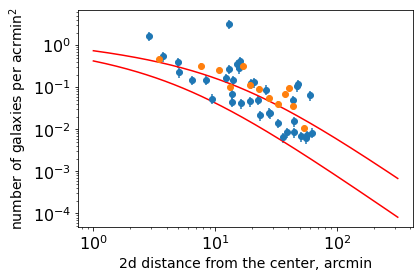

In [111]:
fig1, ax1 = plt.subplots()

RR = np.logspace(0, 2.5, 201)

for Ngal_per_bin in [15, 50]: #как будто чем больше, тем лучше, но 50  это же совсем странно?
    indices = np.arange(1, np.max(df['N']), Ngal_per_bin)
    rbins=np.array([df.r2d[i] for i in indices])
    # центральное r каждого бина
    rc = (rbins[:-1]+rbins[1:])/2.
    # площадь кольца
    area = np.pi*(rbins[1:]**2-rbins[:-1]**2)
    SB = Ngal_per_bin/area
    
    # фитирование projected NFW с учетом статистической погрешности, которая считается как SB/np.sqrt(Ngal_per_bin)
    popt, pcov = curve_fit(sigma_nfw_f, rc, SB, sigma=SB/np.sqrt(Ngal_per_bin))

    
    ax1.errorbar(rc, SB, yerr=SB/np.sqrt(Ngal_per_bin), fmt='o')
    ax1.plot(RR, sigma_nfw_f(RR, *popt), 'r-', label='fit: coef=%5.3f, rs=%5.3f' % tuple(popt))
    

    ax1.set_yscale('log')
    ax1.set_xscale('log')
    
    
plt.tick_params(labelsize=16,grid_linewidth=6)

plt.xlabel("2d distance from the center, arcmin",fontsize=14)
plt.ylabel("number of galaxies per acrmin$^2$", fontsize=14)

#ax1.xaxis.set_major_formatter(mticker.ScalarFormatter())
plt.show()